# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40 points**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* **order_id**: Unique ID of the order
* **customer_id**: ID of the customer who ordered the food
* **restaurant_name**: Name of the restaurant
* **cuisine_type**: Cuisine ordered by the customer
* **cost_of_the_order**: Cost of the order
* **day_of_the_week**: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* **rating**: Rating given by the customer out of 5
* **food_preparation_time**: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* **delivery_time**: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. Read along carefully to complete the project.
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. Please replace the blank with the right code snippet. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw an error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* You can the results/observations derived from the analysis here and use them to create your final presentation.


### Let us start by importing the required libraries

In [2]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [240]:
# Read the data
df = pd.read_csv('/Users/kxw/Desktop/MIT_IDSS_DSML/week_3/foodhub_order.csv')
# Returns the first 5 rows
df.head() 

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data?

In [5]:
# Check the shape of the dataset
df.shape ## Fill in the blank

(1898, 9)

### **Question 2:** What are the datatypes of the different columns in the dataset?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method.

In [7]:
# Checking for missing values in the data
#Write the appropriate function to print the sum of null values for each column
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [8]:
# Get the summary statistics of the numerical data
df.describe(include='all').T ## Write the appropriate function to print the statitical summary of the data (Hint - you have seen this in the case studies before)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


In [242]:
df.describe(include='all').T.to_csv('/Users/kxw/Downloads/foodhub_describe.csv')

In [241]:
df.describe().T ## Write the appropriate function to print the statitical summary of the data (Hint - you have seen this in the case studies before)


,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


### **Question 5:** How many orders are not rated?

In [9]:
df['rating'].value_counts() ## Complete the code 

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

#### Order ID

In [10]:
# check unique order ID
df['order_id'].nunique()  

1898

#### Customer ID

In [11]:
# check unique customer ID
df['customer_id'].nunique()  ## Complete the code to find out number of unique Customer ID

1200

#### Restaurant name

In [12]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  ## Complete the code to find out number of unique Restaurant Name

178

#### Cuisine type

In [13]:
# Check unique cuisine type
df['cuisine_type'].nunique() ## Complete the code to find out  number of  unique cuisine type

14

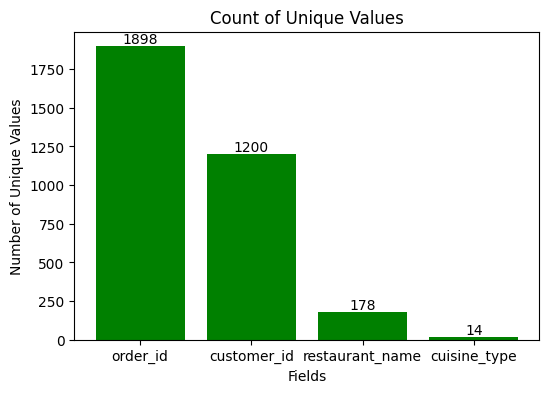

In [14]:
import matplotlib.pyplot as plt

# Calculate the number of unique values for each column
unique_counts = {
    'order_id': df['order_id'].nunique(),
    'customer_id': df['customer_id'].nunique(),
    'restaurant_name': df['restaurant_name'].nunique(),
    'cuisine_type': df['cuisine_type'].nunique()
}

# Create a bar plot for the unique value counts
plt.figure(figsize=(6, 4))
bars = plt.bar(unique_counts.keys(), unique_counts.values(), color='green')

# Add annotations above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

# Set plot titles and labels
plt.title('Count of Unique Values')
plt.xlabel('Fields')
plt.ylabel('Number of Unique Values')
plt.show()


<Axes: xlabel='cuisine_type', ylabel='count'>

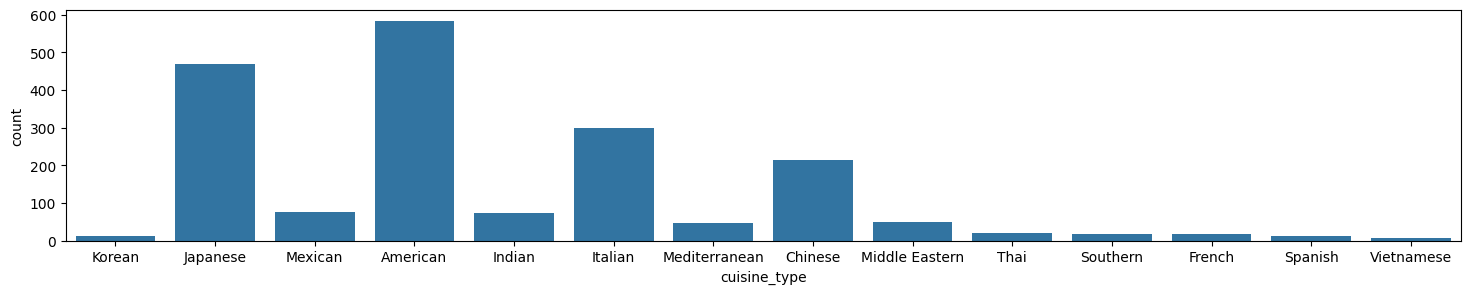

In [15]:
plt.figure(figsize = (18,3))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.

#### Cost of the order

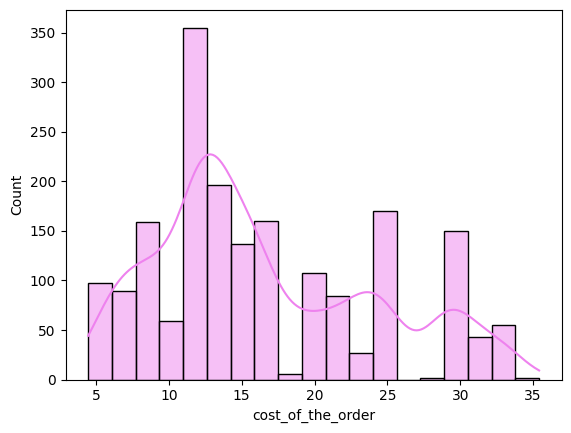

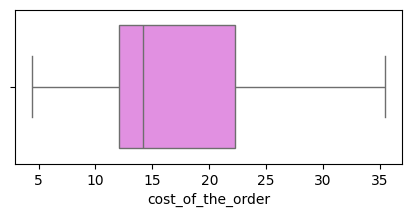

In [74]:
sns.histplot(data=df,x='cost_of_the_order', kde=True, color = 'violet') ## Histogram for the cost of order
plt.show()
plt.figure(figsize = (5,2))

sns.boxplot(data=df,x='cost_of_the_order', color = 'violet') ## Boxplot for the cost of order
plt.show() 

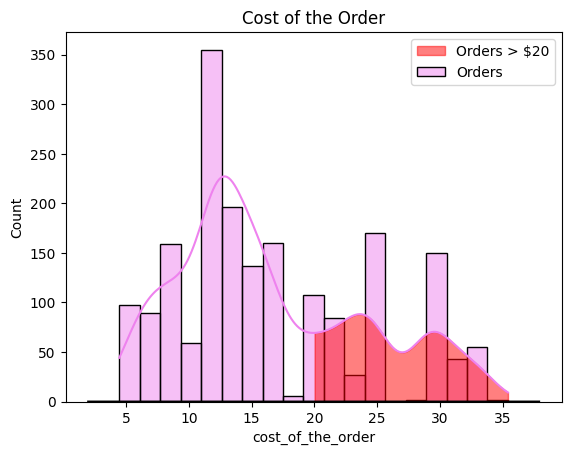

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the KDE for the entire dataset
sns.histplot(data=df, x='cost_of_the_order', kde=True, color='violet', label='Orders')

# Calculate the KDE for shading (seaborn doesn't natively support conditional shading)
kde = sns.kdeplot(data=df, x='cost_of_the_order', color='black', bw_adjust=0.5)

# Extract the data for shading
x_vals = np.linspace(df['cost_of_the_order'].min(), df['cost_of_the_order'].max(), 200)
y_vals = kde.get_lines()[0].get_data()[1]

# Shade the area where cost_of_the_order is greater than $20
plt.fill_between(x_vals[x_vals > 20], y_vals[x_vals > 20], color='red', alpha=0.5, label='Orders > $20')

# Add a legend and title
plt.legend()
plt.title('Cost of the Order')

# Show the plot
plt.show()


#### Day of the week

In [17]:
# # Check the unique values
print(df['day_of_the_week'].nunique()) ## Complete the code to check unique values for the 'day_of_the_week' column
df['day_of_the_week'].value_counts()

2


day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

<Axes: xlabel='day_of_the_week', ylabel='count'>

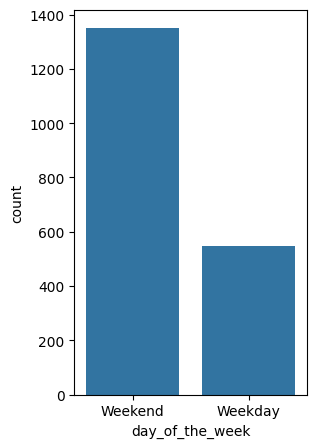

In [39]:
plt.figure(figsize=(3,5))
sns.countplot(data = df, x = 'day_of_the_week') ## Complete the code to plot a bar graph for 'day_of_the_week' column

#### Rating

In [19]:
# Check the unique values
print(df['rating'].nunique()) ## Complete the code to check unique values for the 'rating' column
df['rating'].value_counts()

4


rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

<Axes: xlabel='rating', ylabel='count'>

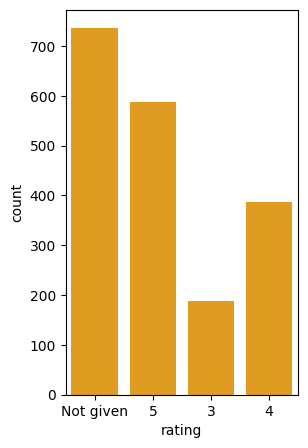

In [40]:
plt.figure(figsize=(3,5))
sns.countplot(data = df, x = 'rating',color = 'orange') ## Complete the code to plot bar graph for 'rating' column

In [21]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

#### Food Preparation time

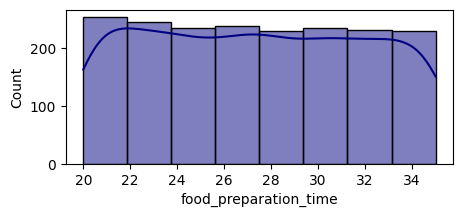

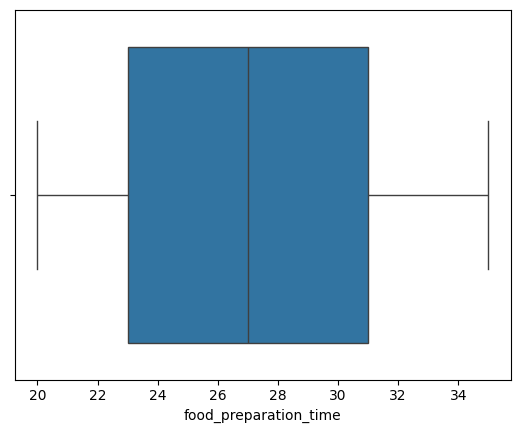

In [49]:
plt.figure(figsize = (5,2))
sns.histplot(data=df,x='food_preparation_time', kde=True, bins = 8,color='navy') ## Complete the code to plot the histogram for the food_preparation_time
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Complete the code to plot the boxplot for the food_preparation_time
plt.show()

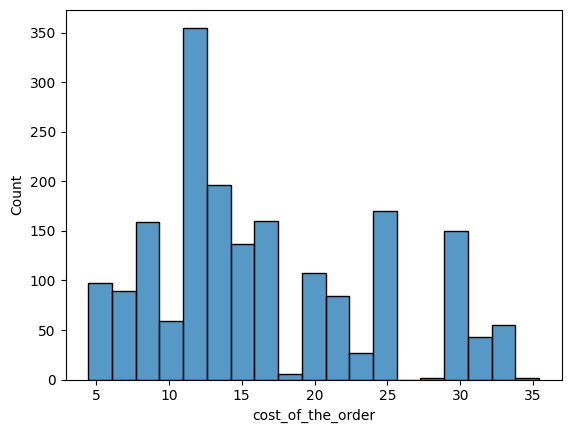

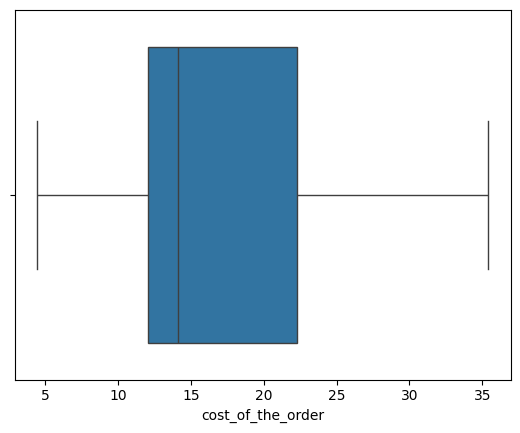

In [23]:
sns.histplot(data=df,x='cost_of_the_order') ## Complete the code to plot the histogram for the cost of order
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Complete the code to plot the boxplot for the cost of order
plt.show()

#### Delivery time

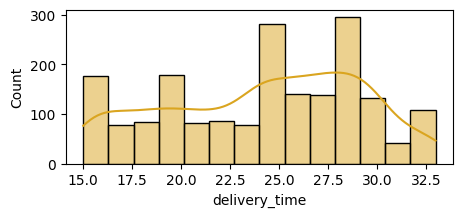

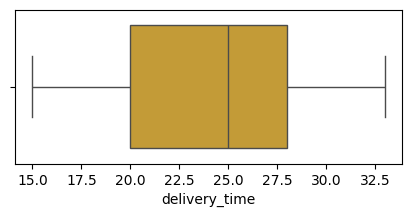

In [69]:
plt.figure(figsize = (5,2))

sns.histplot(data=df,x='delivery_time',kde=True,color = 'goldenrod') ## Complete the code to plot the histogram for the delivery time
plt.show()
plt.figure(figsize = (5,2))
sns.boxplot(data=df,x='delivery_time',color = 'goldenrod') ## Complete the code to plot the boxplot for the delivery time
plt.show()

### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received?

In [25]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5) ## Complete the code

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

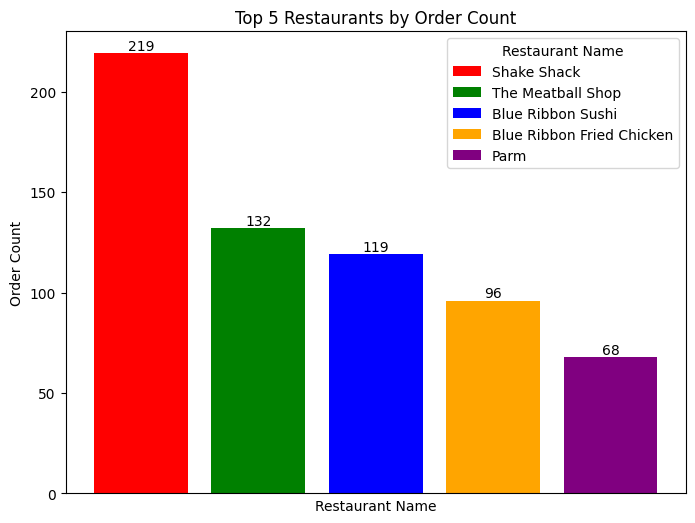

In [57]:
import matplotlib.pyplot as plt

# Get the top 5 restaurant names by count
top_5_restaurants = df['restaurant_name'].value_counts().head(5)

# Define colors for each bar (you can customize these)
colors = ['red', 'green', 'blue', 'orange', 'purple']

# Create bar plot with different colors for each bar
plt.figure(figsize=(8, 6))
bars = plt.bar(top_5_restaurants.index, top_5_restaurants.values, color=colors)

# Add annotations above each bar to show the count
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

# Rotate the x-axis labels by 45 degrees
plt.xticks([])

# Add a legend with the restaurant names
plt.legend(bars, top_5_restaurants.index, title='Restaurant Name')

# Set plot titles and labels
plt.title('Top 5 Restaurants by Order Count')
plt.xlabel('Restaurant Name')
plt.ylabel('Order Count')

# Display the plot
plt.show()


### **Question 8:** Which is the most popular cuisine on weekends?

In [58]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head(5) ## Complete the code to check unique values for the cuisine type on weekend

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: count, dtype: int64

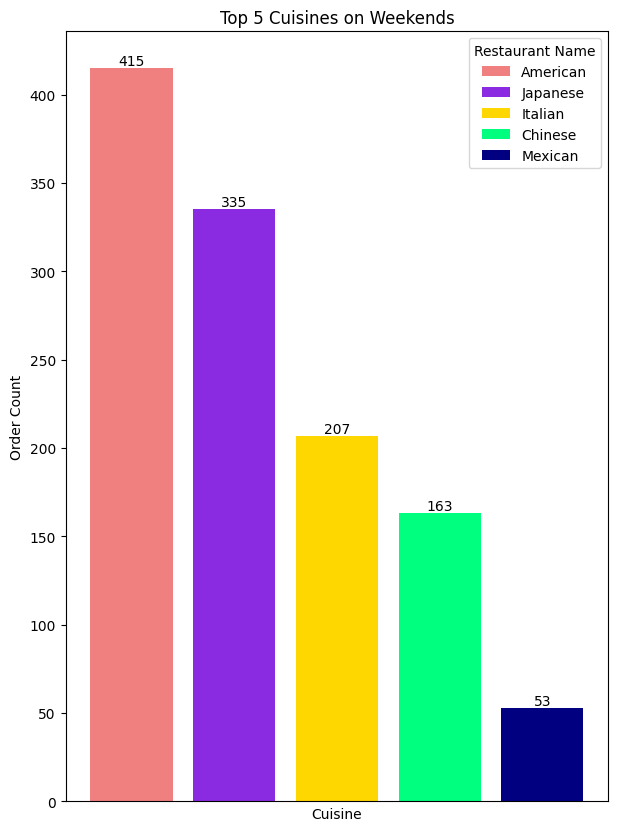

In [73]:
import matplotlib.pyplot as plt

# Get the top 5 restaurant names by count
top5_cuisine = df_weekend['cuisine_type'].value_counts().head(5) ## Complete the code to check unique values for the cuisine type on weekend

# Define colors for each bar (you can customize these)
colors = ['lightcoral', 'blueviolet', 'gold', 'springgreen', 'navy']

# Create bar plot with different colors for each bar
plt.figure(figsize=(7, 10))
bars = plt.bar(top5_cuisine.index, top5_cuisine.values, color=colors)

# Add annotations above each bar to show the count
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

# Rotate the x-axis labels by 45 degrees
plt.xticks([])

# Add a legend with the restaurant names
plt.legend(bars, top5_cuisine.index, title='Restaurant Name')

# Set plot titles and labels
plt.title('Top 5 Cuisines on Weekends')
plt.xlabel('Cuisine')
plt.ylabel('Order Count')

# Display the plot
plt.show()


### **Question 9:** What percentage of the orders cost more than 20 dollars?

In [64]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [65]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


### **Question 10:** What is the mean order delivery time?

In [66]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [70]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(3)  ## Write the appropriate column name to get the top 5 cmost frequent customers

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

### Multivariate Analysis

### **Question 12:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Cuisine vs Cost of the order

/var/folders/d4/q_nbtkcn5rvbvhqnm8124kl00000gn/T/ipykernel_11491/2726146092.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')


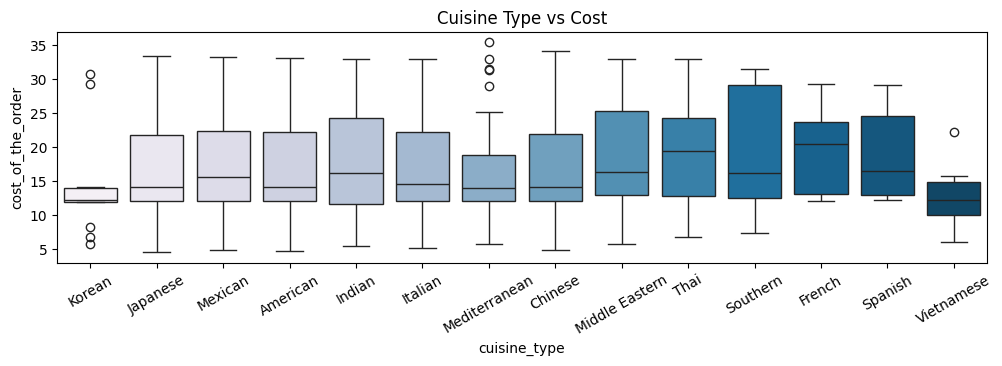

In [117]:
# Relationship between cost of the order and cuisine type
# plt.figure(figsize=(15,7))
plt.figure(figsize=(12,3))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 30)
plt.title('Cuisine Type vs Cost')
plt.show()

/var/folders/d4/q_nbtkcn5rvbvhqnm8124kl00000gn/T/ipykernel_11491/1337301337.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df, order=sorted_cuisines, palette='PuBu')


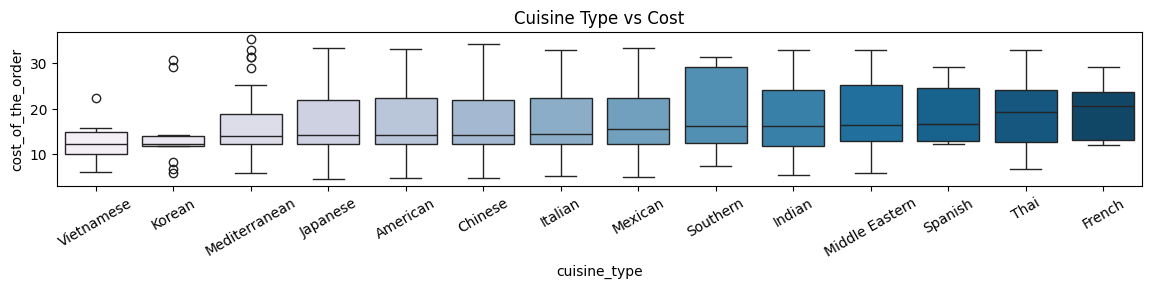

In [123]:
# Calculate the median cost for each cuisine type and sort in ascending order
sorted_cuisines = df.groupby('cuisine_type')['cost_of_the_order'].median().sort_values().index

# Create the boxplot with sorted categories based on median
plt.figure(figsize=(14, 2))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df, order=sorted_cuisines, palette='PuBu')

# Rotate x-axis labels for readability
plt.xticks(rotation=30)
plt.title('Cuisine Type vs Cost')
# Show the plot
plt.show()

/var/folders/d4/q_nbtkcn5rvbvhqnm8124kl00000gn/T/ipykernel_11491/3299510066.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, order=sorted_cuisines_time,
/var/folders/d4/q_nbtkcn5rvbvhqnm8124kl00000gn/T/ipykernel_11491/3299510066.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df, order=sorted_cuisines_cost,


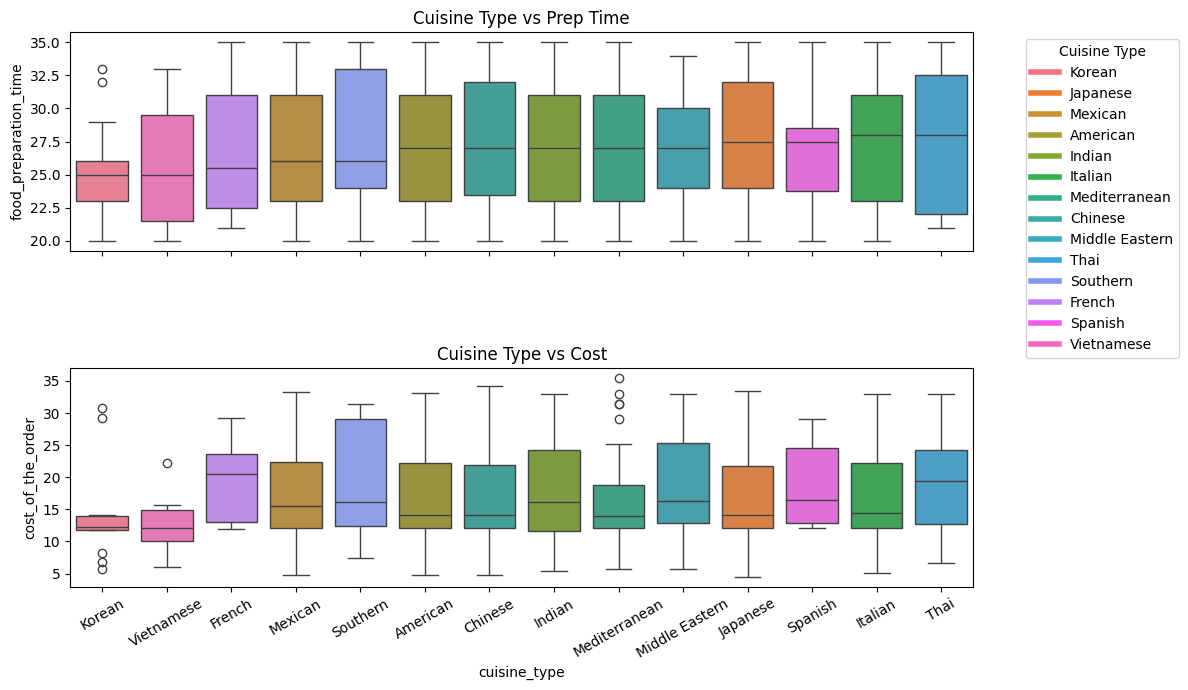

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define a color palette for the cuisines based on unique cuisine types
unique_cuisines = df['cuisine_type'].unique()
colors = sns.color_palette('husl', len(unique_cuisines))  # Generate a color palette

# Map each cuisine type to a specific color
cuisine_color_map = dict(zip(unique_cuisines, colors))

# Create a custom color function based on cuisine type
def get_colors(cuisines):
    return [cuisine_color_map[cuisine] for cuisine in cuisines]

# Sort cuisines based on the median 'food_preparation_time'
sorted_cuisines_time = df.groupby('cuisine_type')['food_preparation_time'].median().sort_values().index

# Sort cuisines based on the median 'cost_of_the_order'
sorted_cuisines_cost = df.groupby('cuisine_type')['cost_of_the_order'].median().sort_values().index

# Create the figure and axes (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(12, 7), sharex=True)

# Plot 1: Cuisine Type vs Food Preparation Time
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, order=sorted_cuisines_time, 
            palette=get_colors(sorted_cuisines_time), ax=axes[0])
axes[0].set_title('Cuisine Type vs Prep Time')
axes[0].tick_params(axis='x', rotation=30)

# Plot 2: Cuisine Type vs Cost of the Order
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df, order=sorted_cuisines_cost, 
            palette=get_colors(sorted_cuisines_cost), ax=axes[1])
axes[1].set_title('Cuisine Type vs Cost')
axes[1].tick_params(axis='x', rotation=30)

# Create a shared legend for both plots
handles = [plt.Line2D([0], [0], color=cuisine_color_map[cuisine], lw=4) for cuisine in unique_cuisines]
axes[0].legend(handles, unique_cuisines, title='Cuisine Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


#### Cuisine vs Food Preparation time

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [97]:
cat_cols = ['cuisine_type','day_of_the_week','rating']
num_cols = ['food_preparation_time','delivery_time','cost_of_the_order']

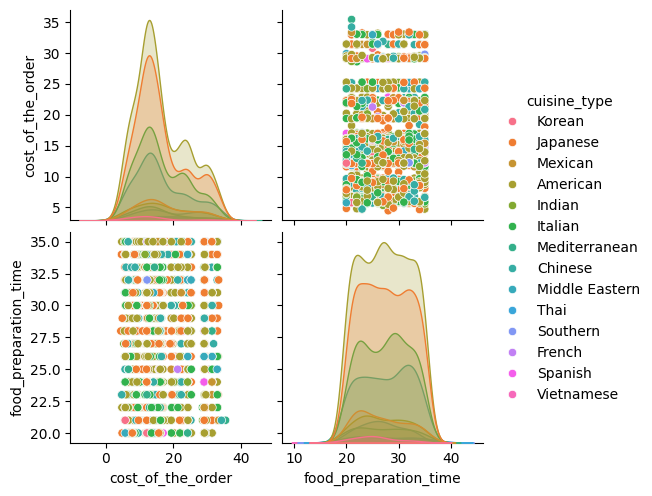

In [100]:
sns.pairplot(data=df, vars=['cost_of_the_order','food_preparation_time'], hue='cuisine_type');

/var/folders/d4/q_nbtkcn5rvbvhqnm8124kl00000gn/T/ipykernel_11491/11682355.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, order=sorted_cuisines, palette='PuBu')


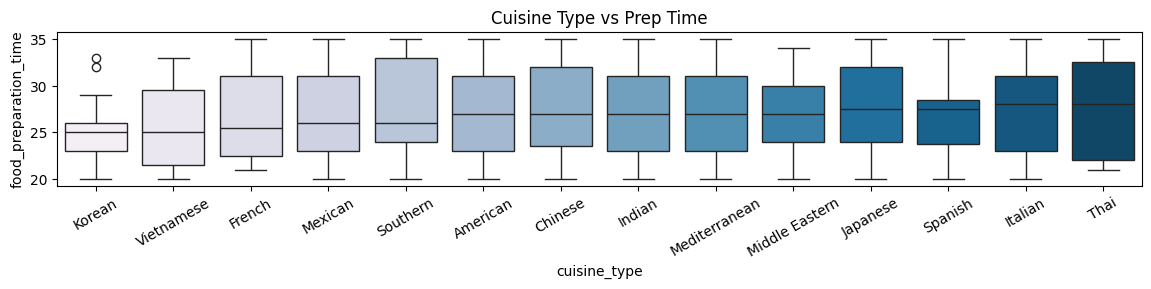

In [122]:
# Calculate the median cost for each cuisine type and sort in ascending order
sorted_cuisines = df.groupby('cuisine_type')['food_preparation_time'].median().sort_values().index

# Create the boxplot with sorted categories based on median
plt.figure(figsize=(14, 2))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, order=sorted_cuisines, palette='PuBu')

# Rotate x-axis labels for readability
plt.xticks(rotation=30)
plt.title('Cuisine Type vs Prep Time')
# Show the plot
plt.show()

/var/folders/d4/q_nbtkcn5rvbvhqnm8124kl00000gn/T/ipykernel_11491/4155693900.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x='cuisine_type', y='food_preparation_time',palette='PuBu')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot


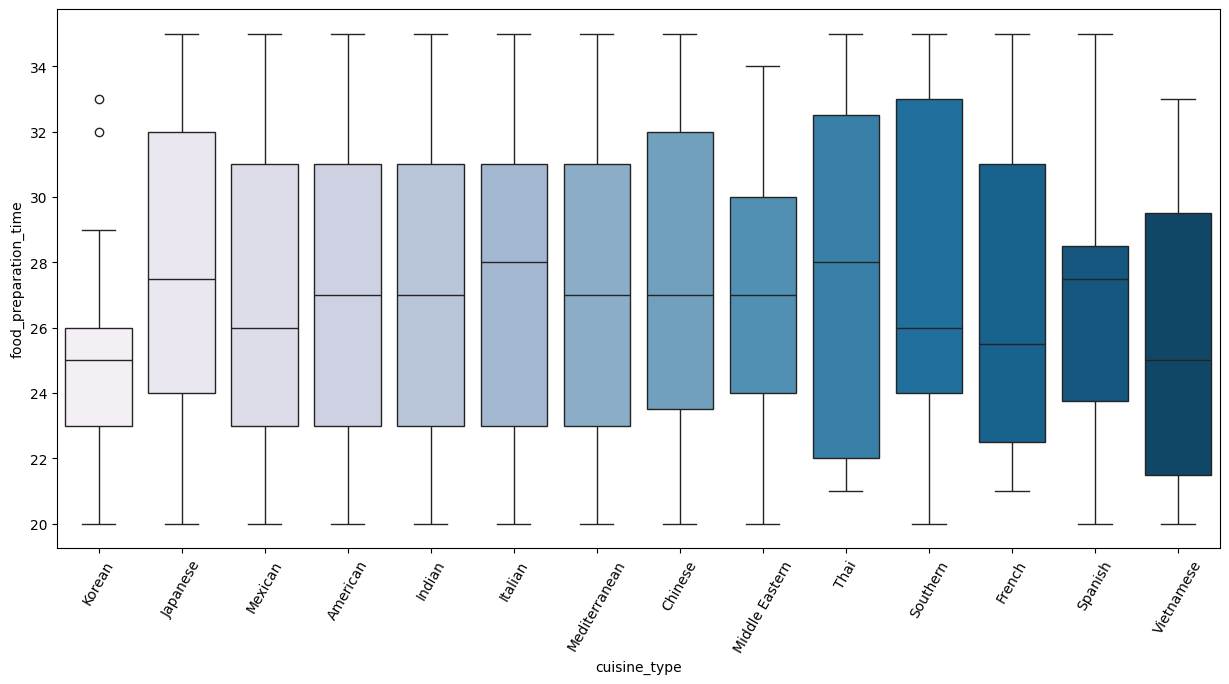

In [104]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x='cuisine_type', y='food_preparation_time',palette='PuBu')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

#### Day of the Week vs Delivery time

/var/folders/d4/q_nbtkcn5rvbvhqnm8124kl00000gn/T/ipykernel_11491/97519642.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'day_of_the_week',y = 'delivery_time', palette='colorblind')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot


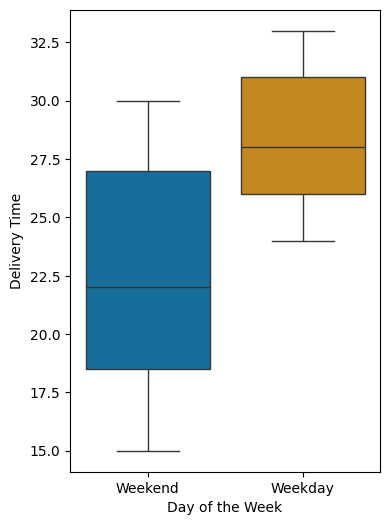

In [135]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(4,6))
sns.boxplot(data = df, x = 'day_of_the_week',y = 'delivery_time', palette='colorblind')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.show()

#### Run the below code and write your observations on the revenue generated by the restaurants

In [93]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

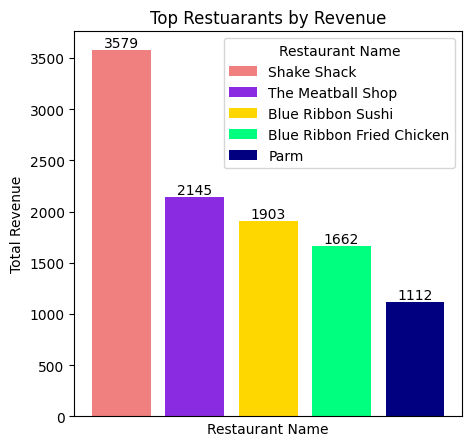

In [158]:
title = 'Top Restuarants by Revenue'
x_label = 'Restaurant Name'
y_label = 'Total Revenue'
fsize = (5,5 )
colors = ['lightcoral', 'blueviolet', 'gold', 'springgreen', 'navy']
top_resy = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(5)
def barplot_(df, title,x_label, y_label, fsize): 

    # Create bar plot with different colors for each bar
    plt.figure(figsize=fsize)
    bars = plt.bar(df.index, df.values, color=colors)

    # Add annotations above each bar to show the count
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

    # Rotate the x-axis labels by 45 degrees
    plt.xticks([])

    # Add a legend with the restaurant names
    plt.legend(bars, df.index, title='Restaurant Name')

    # Set plot titles and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Display the plot
    plt.show()

barplot_(top_resy,title,x_label, y_label, fsize )

#### Rating vs Delivery time

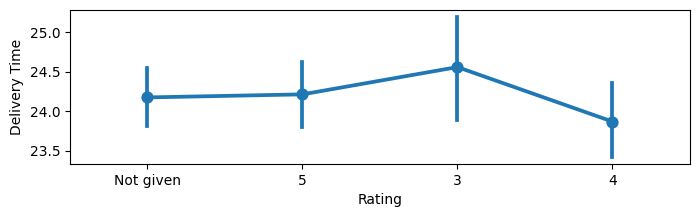

In [151]:
# Relationship between rating and delivery time
plt.figure(figsize=(8, 2))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.ylabel('Delivery Time')
plt.xlabel('Rating')
plt.show()

#### Rating vs Food preparation time

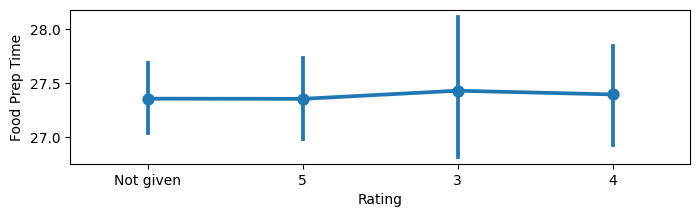

In [152]:
# Relationship between rating and food preparation time
plt.figure(figsize=(8, 2))
sns.pointplot(data = df, x='rating',y='food_preparation_time')  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.ylabel('Food Prep Time')
plt.xlabel('Rating')
plt.show()

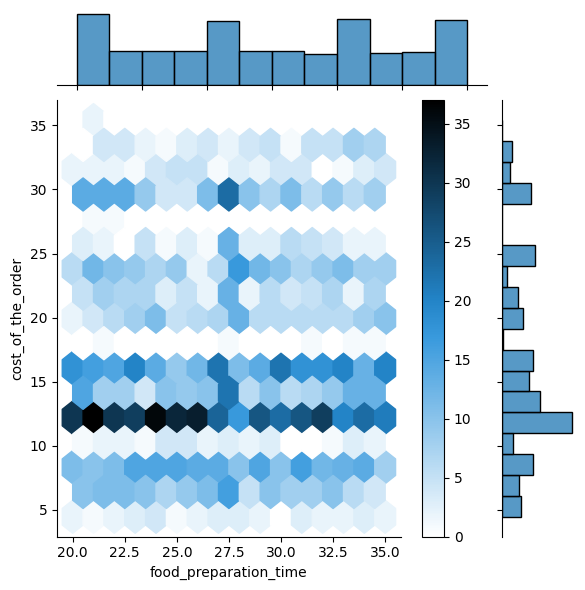

In [150]:
sns.jointplot(data=df, x='food_preparation_time', y='cost_of_the_order', kind="hex");
plt.colorbar(); # adds a separate axis indicating the color scale in this plot

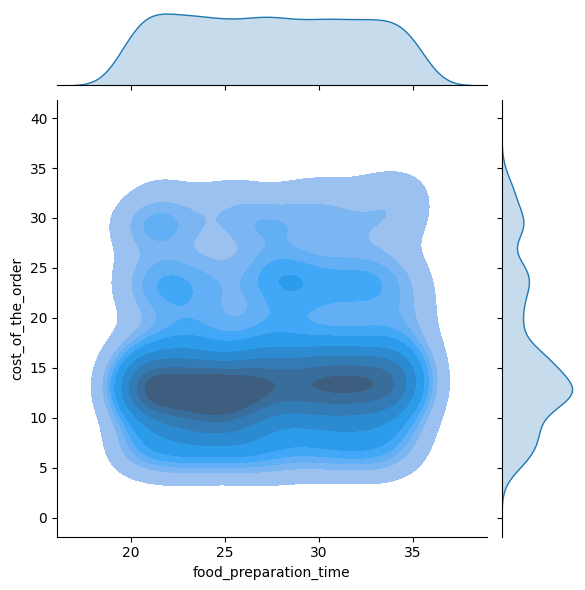

In [147]:
sns.jointplot(data=df, x='food_preparation_time', y='cost_of_the_order', kind="kde", fill=True);


#### Rating vs Cost of the order

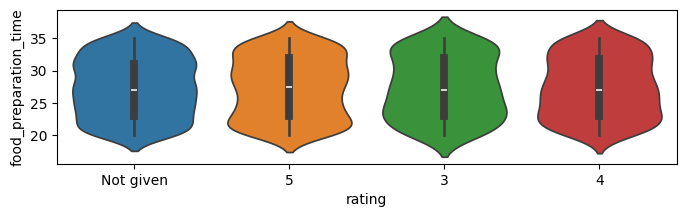

In [153]:
plt.figure(figsize=(8, 2))
sns.violinplot(data=df, x='rating', y='food_preparation_time',hue = 'rating');


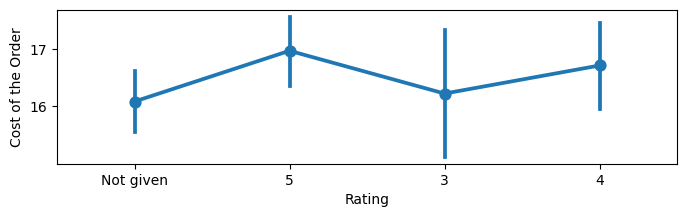

In [155]:
# Relationship between rating and cost of the order
plt.figure(figsize=(8, 2))
sns.pointplot(data = df, x='rating',y='cost_of_the_order')   ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.ylabel('Cost of the Order')
plt.xlabel('Rating')
plt.show()

#### Correlation among variables

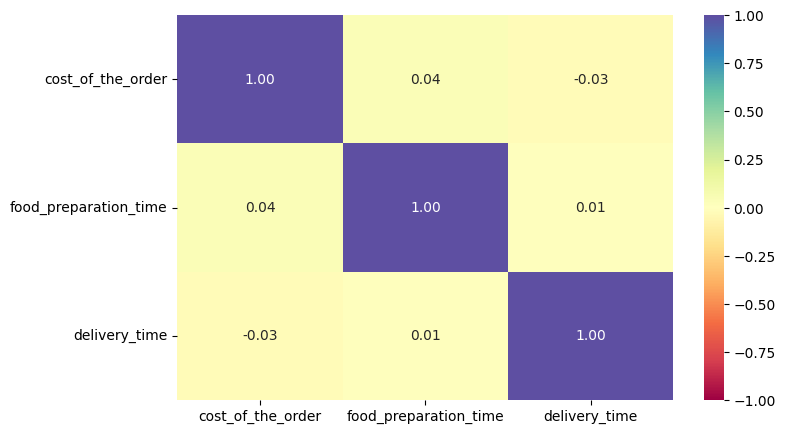

In [220]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(8, 5))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [ ]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

plt.figure(figsize=(8, 5))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

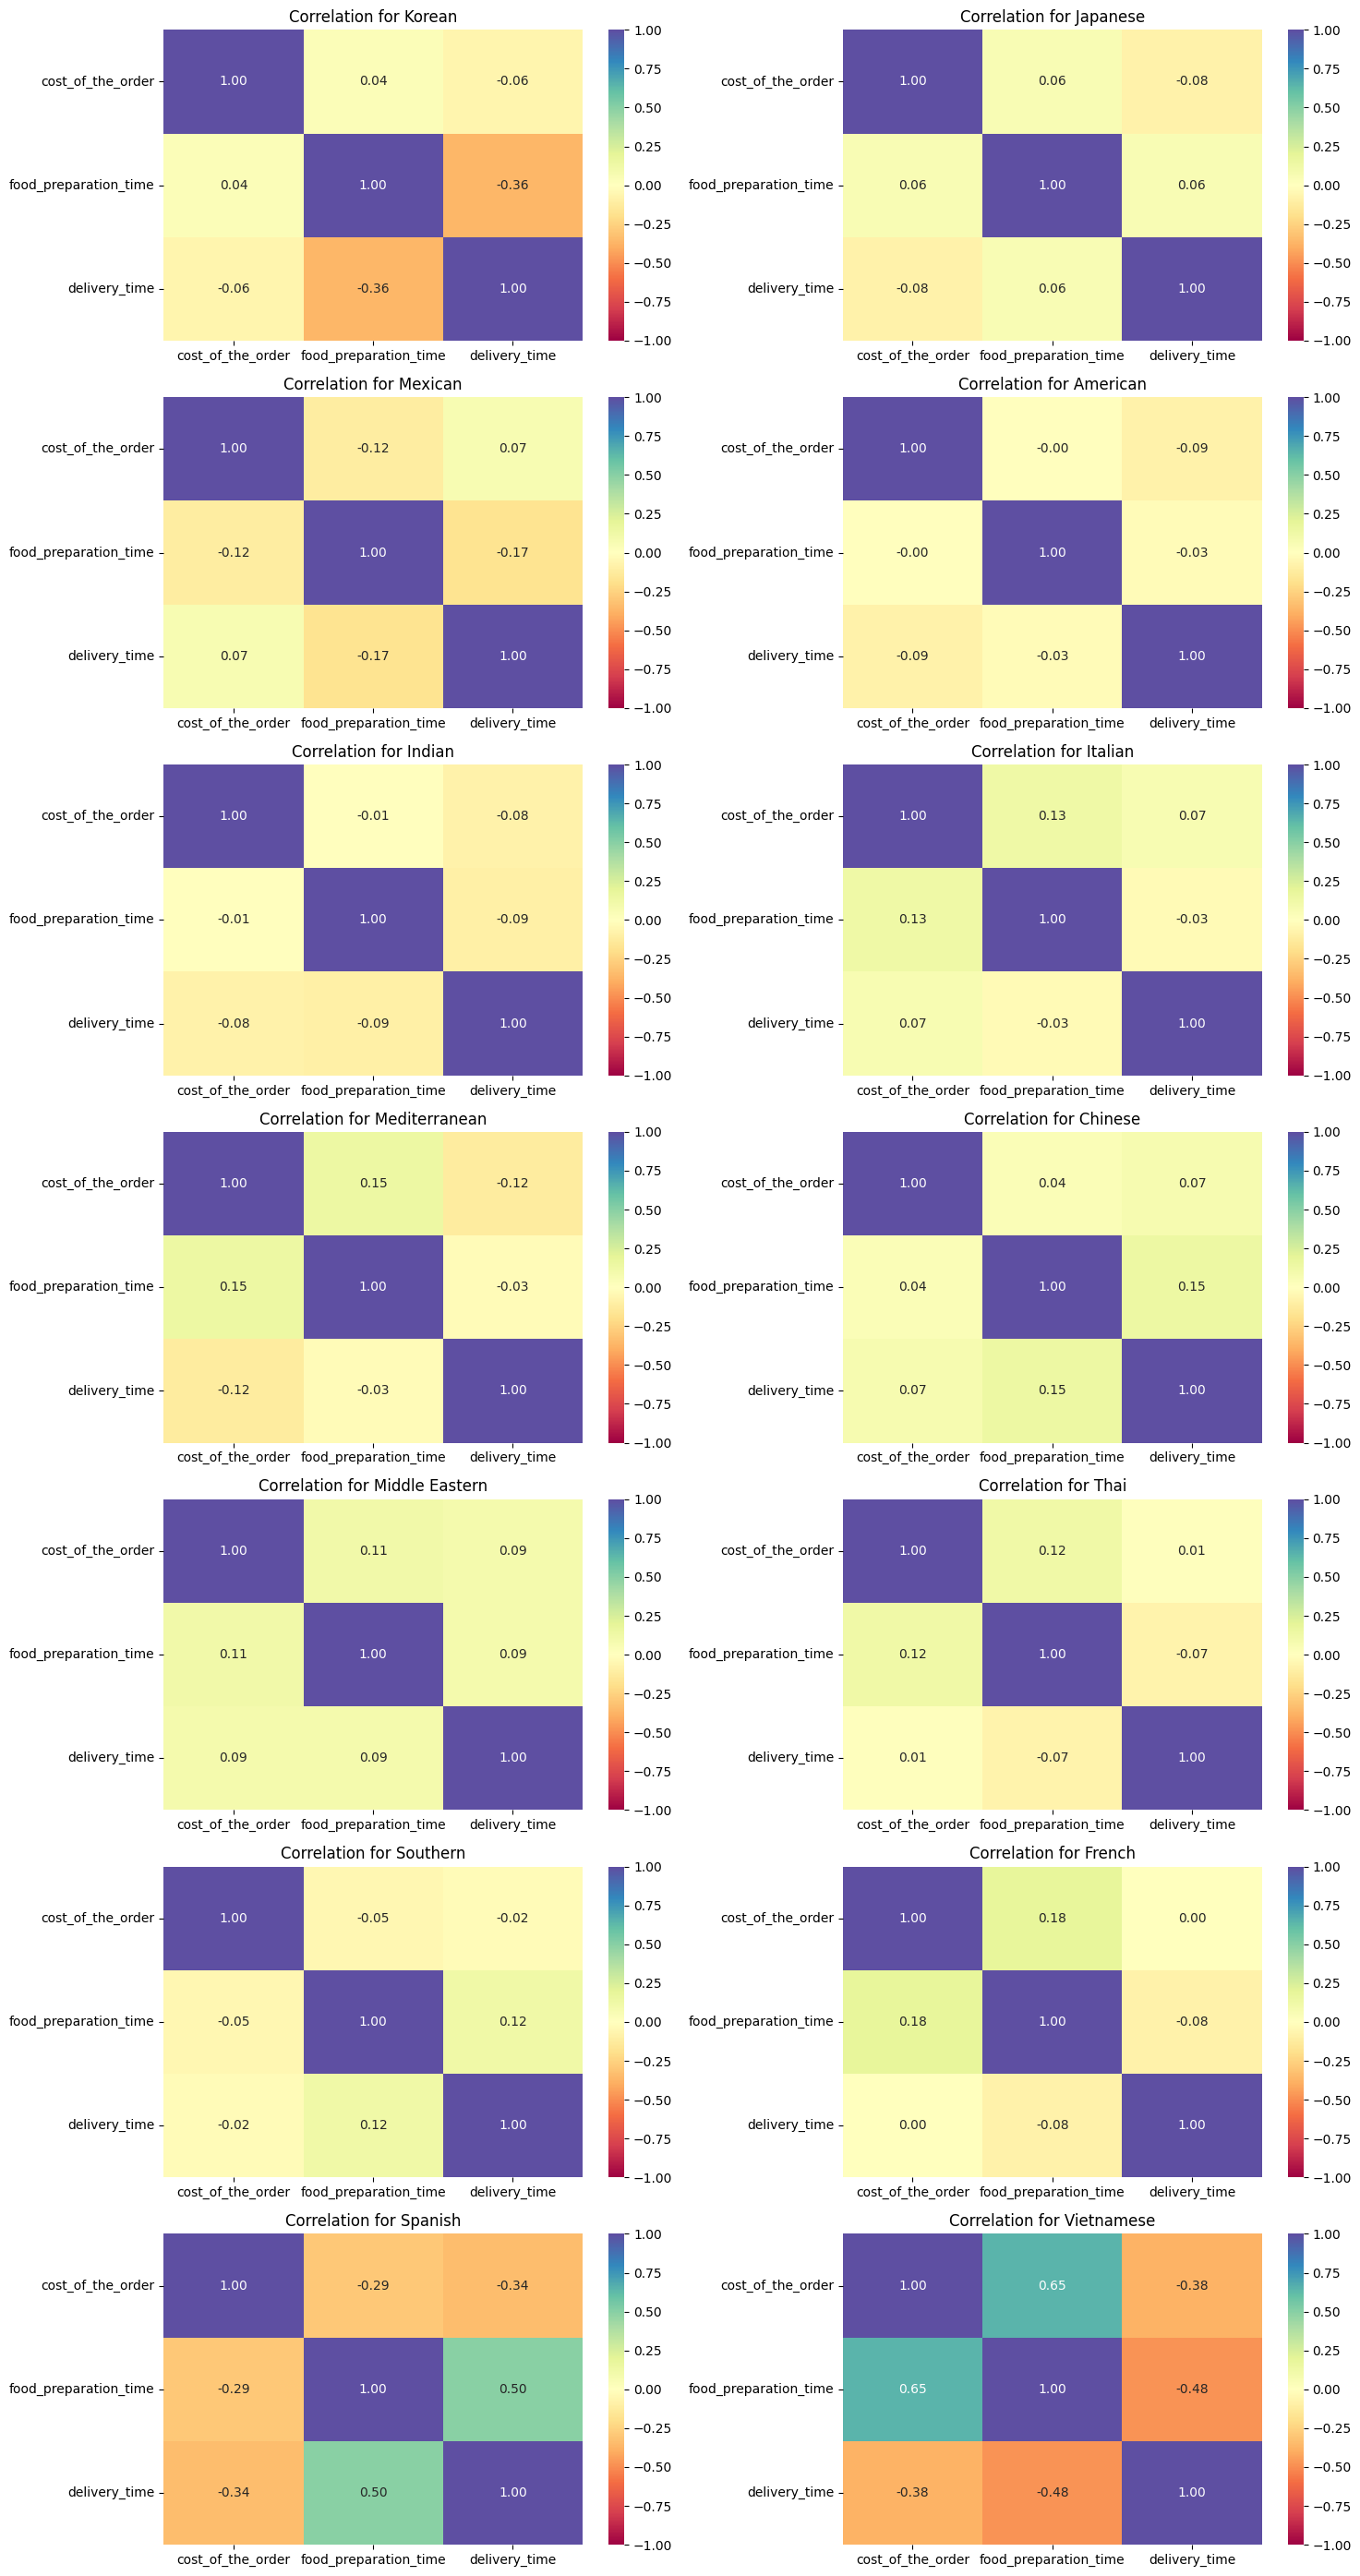

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of columns for correlation
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

# Get unique cuisine types
unique_cuisines = df['cuisine_type'].unique()

# Define the number of rows and columns for the subplots (adjust as necessary based on the number of cuisines)
n_rows = len(unique_cuisines) // 2 + len(unique_cuisines) % 2  # Adjust rows based on the number of unique cuisines

# Create subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 4 * n_rows))  # 2 columns, variable number of rows
axes = axes.flatten()  # Flatten to easily iterate over the axes

# Iterate over each cuisine type and create a heatmap for each
for i, cuisine in enumerate(unique_cuisines):
    # Filter the DataFrame for the current cuisine type
    df_cuisine = df[df['cuisine_type'] == cuisine]
    
    # Calculate the correlation matrix for the selected columns
    corr_matrix = df_cuisine[col_list].corr()
    
    # Create the heatmap on the corresponding subplot
    sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", ax=axes[i])
    
    # Set the title for each subplot
    axes[i].set_title(f'Correlation for {cuisine}')

# Remove any unused subplots if there is an odd number of cuisine types
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [166]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [162]:
rest_names = df_rating_count.loc[df_rating_count['rating']> 50,['restaurant_name']]  ## Complete the code to get the restaurant names having rating count more than 50
rest_names

,restaurant_name
0,Shake Shack
1,The Meatball Shop
2,Blue Ribbon Sushi
3,Blue Ribbon Fried Chicken


In [ ]:
# rest_names = df_rating_count.loc[df_rating_count['rating']> 50,['restaurant_name']]  ## Complete the code to get the restaurant names having rating count more than 50

In [167]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count['_____']['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50


# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['_____'])['_____'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


In [170]:
# Step 1: Get the restaurant names that have a rating count of more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']  # Filter restaurants with count > 50

# Step 2: Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Step 3: Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4 = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()
# df_mean_4
# Step 4: Filter to find restaurants that have a mean rating greater than 4
df_promo_restaurants = df_mean_4[df_mean_4['rating'] > 4]
df_promo_restaurants

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


In [174]:
df_mean_4

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


In [172]:
# Step 1: Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Step 2: Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Step 3: Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
df_rating_count.columns = ['restaurant_name', 'rating_count']

# Step 4: Calculate the average rating for each restaurant
df_rating_avg = df_rated.groupby(['restaurant_name'])['rating'].mean().reset_index()
df_rating_avg.columns = ['restaurant_name', 'avg_rating']

# Step 5: Merge the rating count and average rating dataframes
df_rating_summary = pd.merge(df_rating_count, df_rating_avg, on='restaurant_name')

# Step 6: Filter the restaurants that meet the promotional offer criteria
# Condition: Rating count > 50 and average rating > 4
df_promo_restaurants = df_rating_summary[(df_rating_summary['rating_count'] > 50) & (df_rating_summary['avg_rating'] > 4)]

# Step 7: Display the results
df_promo_restaurants = df_promo_restaurants.sort_values(by='avg_rating', ascending=False).reset_index(drop=True)
df_promo_restaurants

,restaurant_name,rating_count,avg_rating
0,The Meatball Shop,84,4.511905
1,Blue Ribbon Fried Chicken,64,4.328125
2,Shake Shack,133,4.278195
3,Blue Ribbon Sushi,73,4.219178


In [228]:
df.loc[df['restaurant_name'].isin(df_promo_restaurants['restaurant_name']),'cuisine_type'].value_counts()

cuisine_type
American    335
Japanese    119
Italian     112
Name: count, dtype: int64

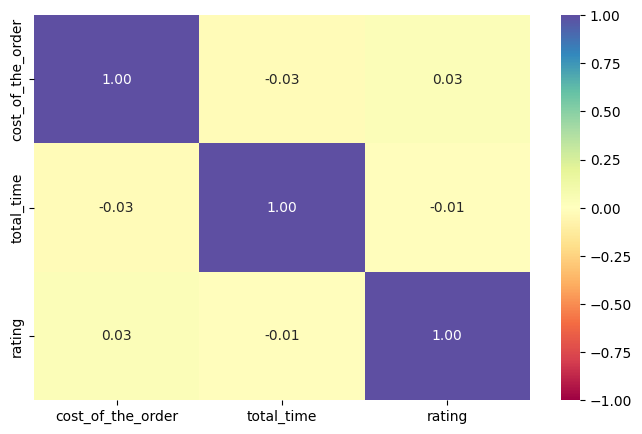

In [225]:
# Plot the heatmap 
# col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time','rating']
col_list = ['cost_of_the_order', 'total_time','rating']
plt.figure(figsize=(8, 5))
sns.heatmap(df_rated[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

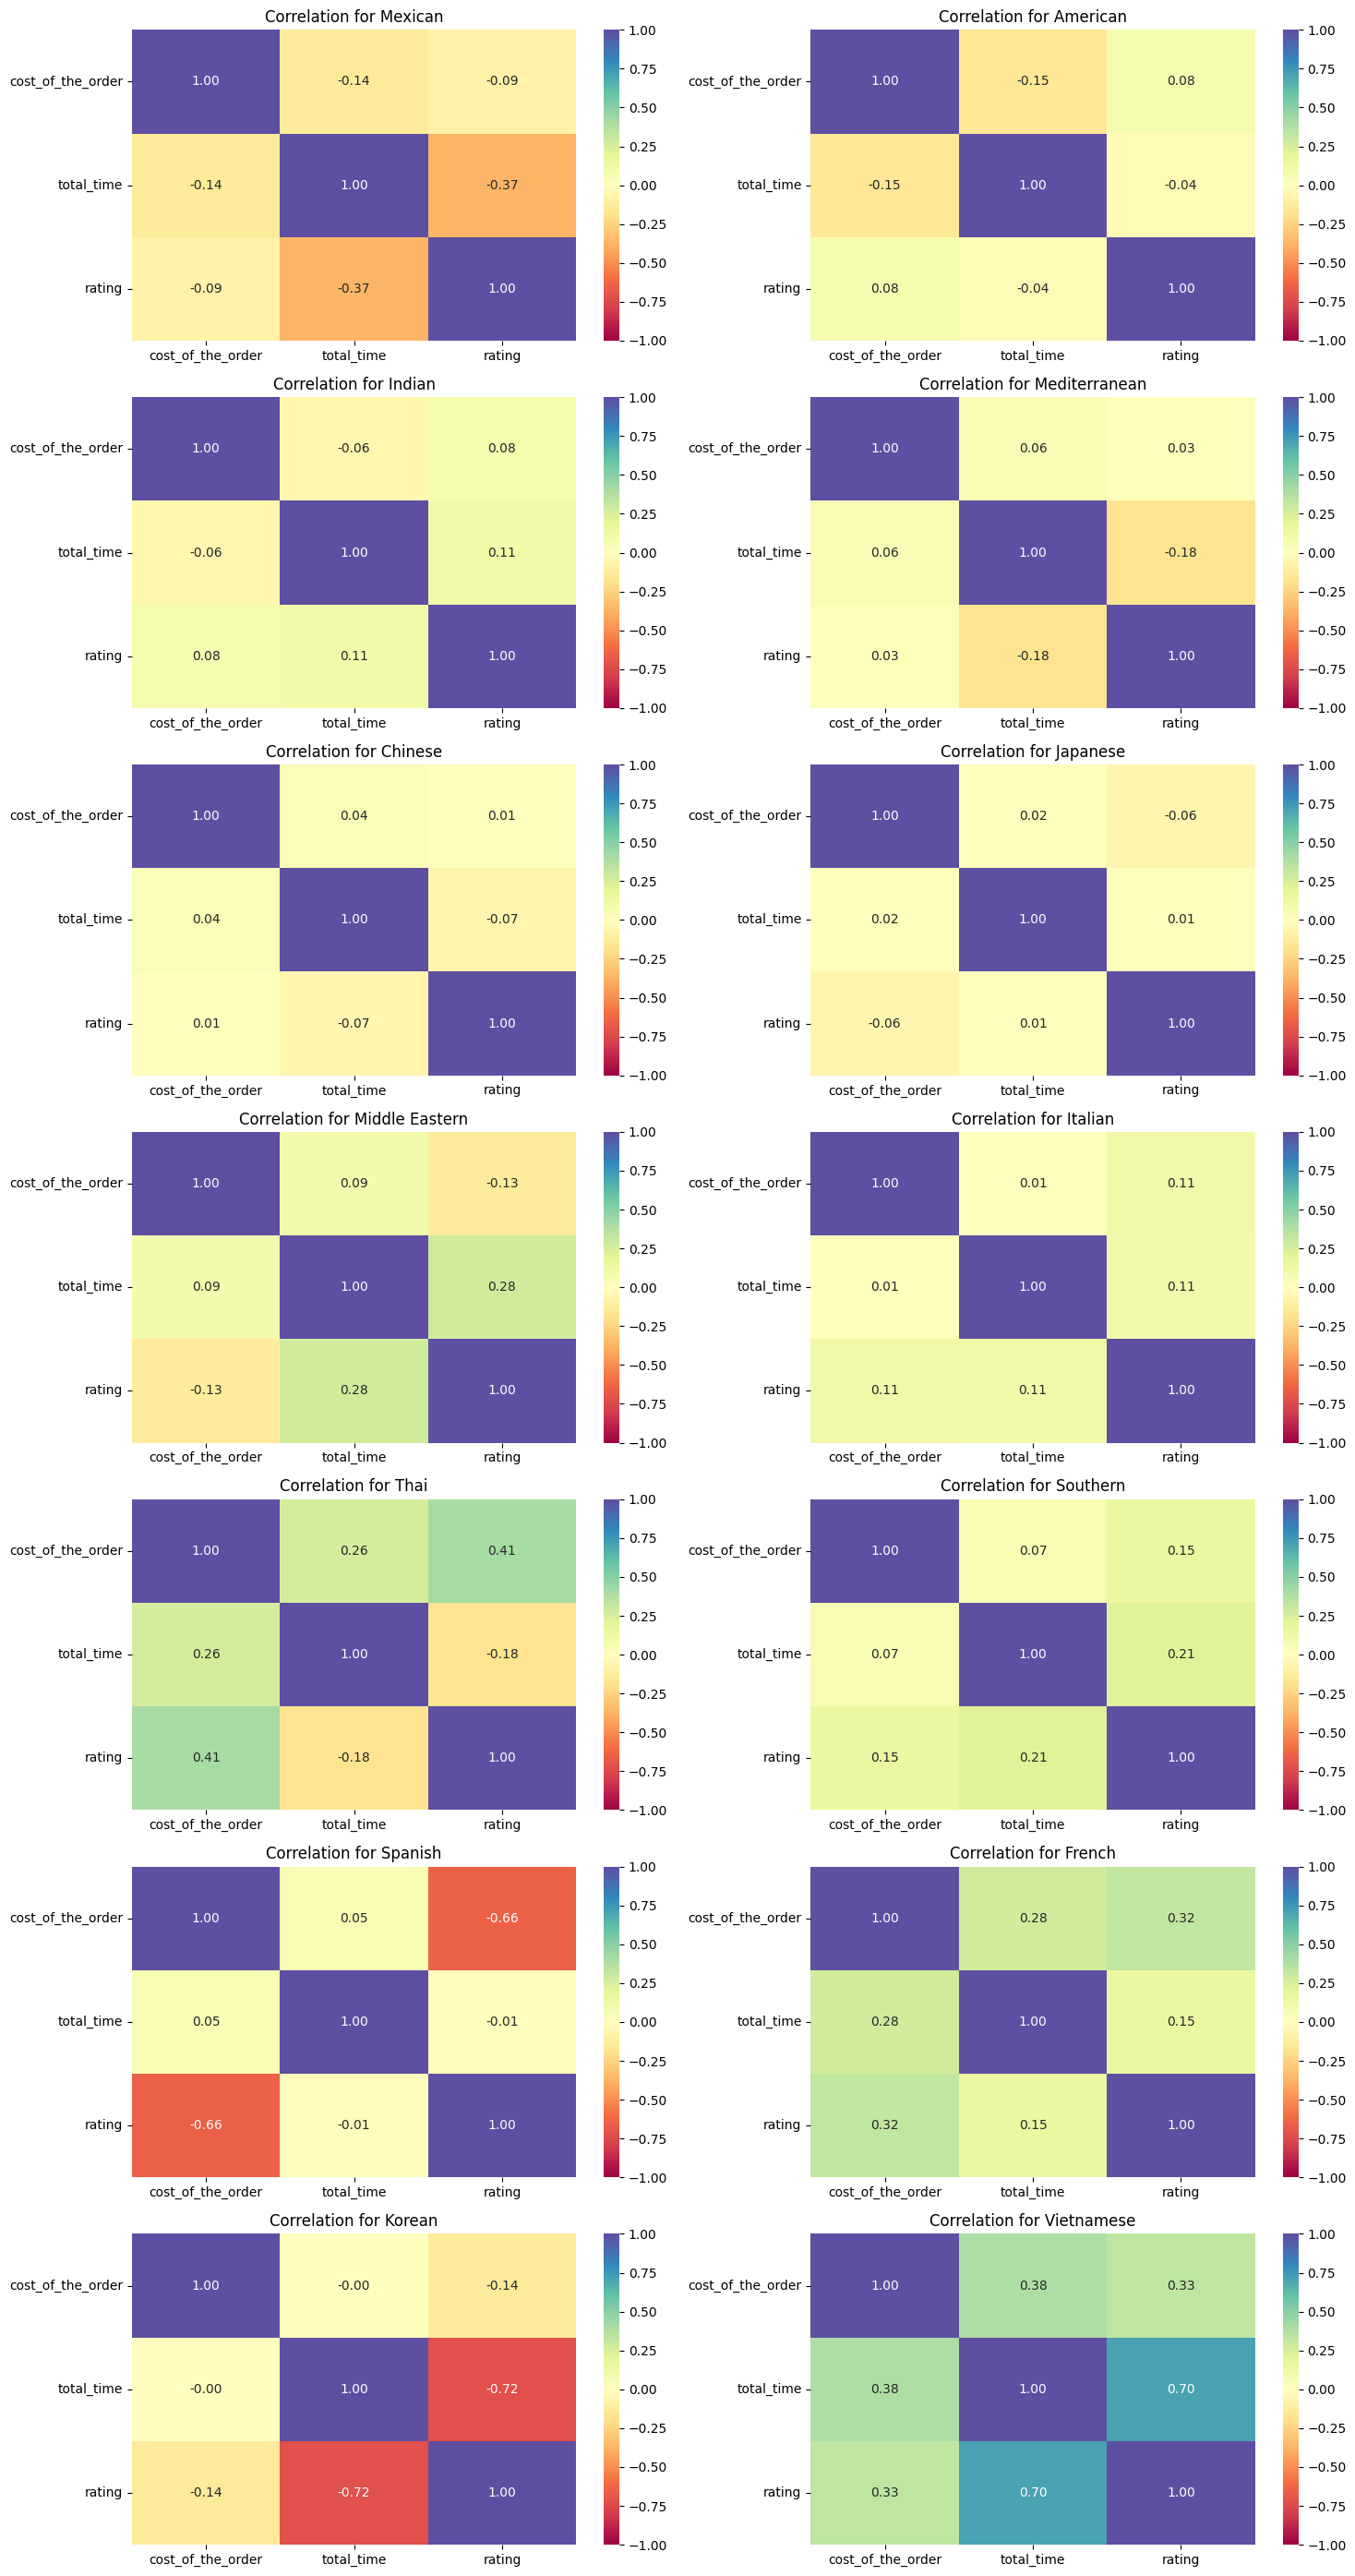

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
df_rated['total_time'] = df_rated['food_preparation_time']+ df_rated['delivery_time']
# Define the list of columns for correlation
# col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time','rating']
col_list = ['cost_of_the_order', 'total_time','rating']

# Get unique cuisine types
unique_cuisines = df_rated['cuisine_type'].unique()

# Define the number of rows and columns for the subplots (adjust as necessary based on the number of cuisines)
n_rows = len(unique_cuisines) // 2 + len(unique_cuisines) % 2  # Adjust rows based on the number of unique cuisines

# Create subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 4 * n_rows))  # 2 columns, variable number of rows
axes = axes.flatten()  # Flatten to easily iterate over the axes

# Iterate over each cuisine type and create a heatmap for each
for i, cuisine in enumerate(unique_cuisines):
    # Filter the DataFrame for the current cuisine type
    df_cuisine = df_rated[df_rated['cuisine_type'] == cuisine]
    
    # Calculate the correlation matrix for the selected columns
    corr_matrix = df_cuisine[col_list].corr()
    
    # Create the heatmap on the corresponding subplot
    sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", ax=axes[i])
    
    # Set the title for each subplot
    axes[i].set_title(f'Correlation for {cuisine}')

# Remove any unused subplots if there is an odd number of cuisine types
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


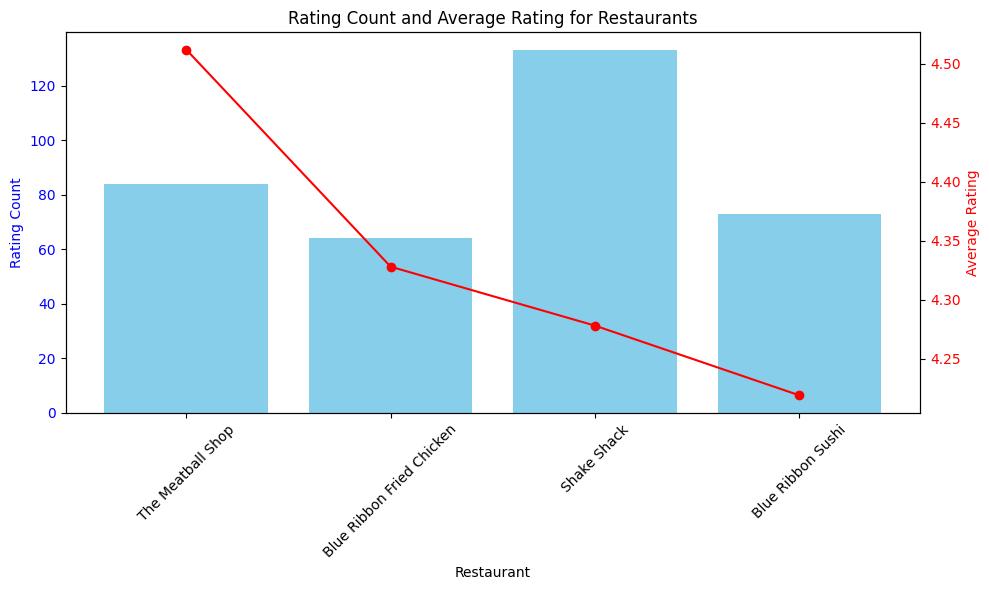

In [173]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_promo_restaurants contains 'restaurant_name', 'rating_count', and 'avg_rating'
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot bar for rating count
ax1.bar(df_promo_restaurants['restaurant_name'], df_promo_restaurants['rating_count'], color='skyblue', label='Rating Count')
ax1.set_xlabel('Restaurant')
ax1.set_ylabel('Rating Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)

# Create second y-axis for average rating
ax2 = ax1.twinx()
ax2.plot(df_promo_restaurants['restaurant_name'], df_promo_restaurants['avg_rating'], color='red', marker='o', label='Average Rating')
ax2.set_ylabel('Average Rating', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add titles and show the plot
plt.title('Rating Count and Average Rating for Restaurants')
fig.tight_layout()
plt.show()


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [175]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [176]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


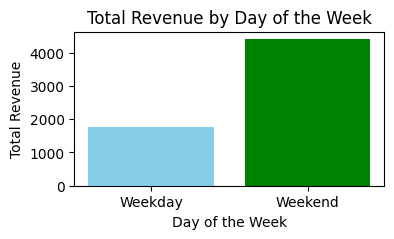

In [196]:
import matplotlib.pyplot as plt

# Group the data by 'day_of_the_week' and sum the revenue for each day
revenue_by_day = df.groupby('day_of_the_week')['Revenue'].sum().reset_index()

# Sort days of the week if necessary (e.g., Monday to Sunday)
# days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# revenue_by_day['day_of_the_week'] = pd.Categorical(revenue_by_day['day_of_the_week'], categories=days_order, ordered=True)
revenue_by_day = revenue_by_day.sort_values('day_of_the_week')

# Plotting total revenue by day of the week
plt.figure(figsize=(4, 2))
plt.bar(revenue_by_day['day_of_the_week'], revenue_by_day['Revenue'], color=['skyblue','green'])

# Adding titles and labels
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')

# Show the plot
plt.show()


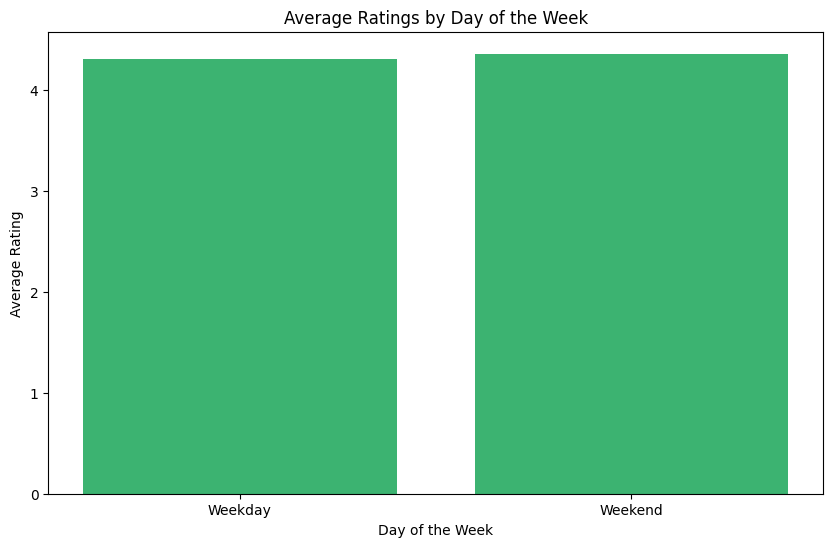

In [233]:
import matplotlib.pyplot as plt

# Convert the 'rating' column to numeric if it contains non-numeric values
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group the data by 'day_of_the_week' and calculate the mean rating for each day
ratings_by_day = df.groupby('day_of_the_week')['rating'].mean().reset_index()

# Sort the days of the week if necessary (e.g., Monday to Sunday)
# days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# ratings_by_day['day_of_the_week'] = pd.Categorical(ratings_by_day['day_of_the_week'], categories=days_order, ordered=True)
ratings_by_day = ratings_by_day.sort_values('day_of_the_week')

# Plotting the average ratings by day of the week
plt.figure(figsize=(10, 6))
plt.bar(ratings_by_day['day_of_the_week'], ratings_by_day['rating'], color='mediumseagreen')

# Adding titles and labels
plt.title('Average Ratings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rating')

# Show the plot
plt.show()


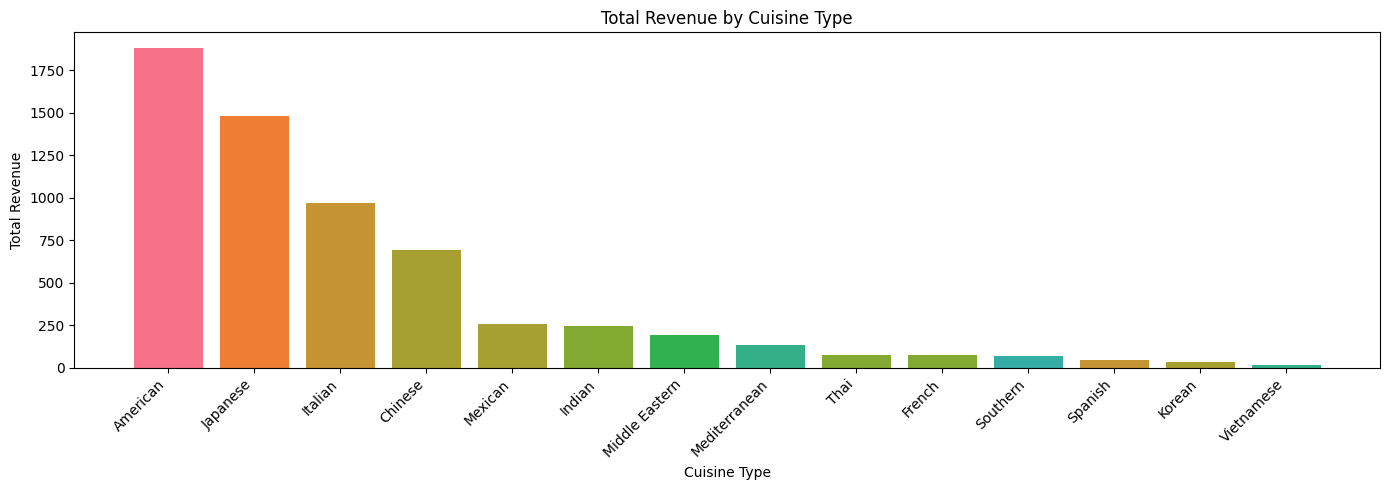

In [217]:
import matplotlib.pyplot as plt

# Group the data by 'cuisine_type' and sum the revenue for each cuisine
revenue_by_cuisine = df.groupby('cuisine_type')['Revenue'].sum().reset_index()

# Sort values by total revenue for a cleaner visualization (optional)
revenue_by_cuisine = revenue_by_cuisine.sort_values(by='Revenue', ascending=False)

# Plotting total revenue by cuisine type
plt.figure(figsize=(14, 5))
# plt.bar(revenue_by_cuisine['cuisine_type'], revenue_by_cuisine['Revenue'], color='lightcoral')
plt.bar(revenue_by_cuisine['cuisine_type'], revenue_by_cuisine['Revenue'],color = get_colors(df['cuisine_type']))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding titles and labels
plt.title('Total Revenue by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Total Revenue')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [177]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)

df_total_60 = df[df['total_time']>60] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that take more than 60 mins:', df_total_60.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_total_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders taking more than 60 mins:", round(percentage, 2), '%')



The number of total orders that take more than 60 mins: 200
Percentage of orders taking more than 60 mins: 10.54 %


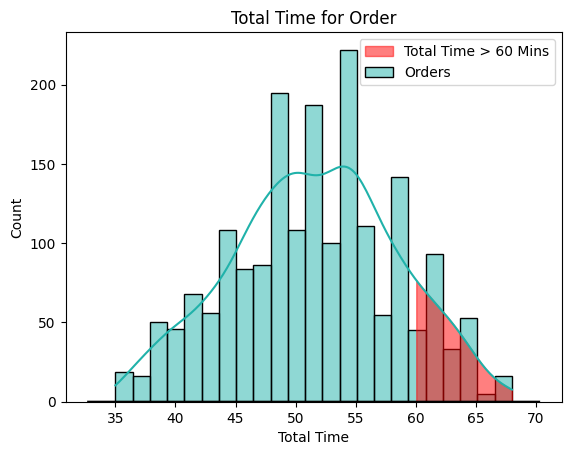

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figsize
# Plot the KDE for the entire dataset
sns.histplot(data=df, x='total_time', kde=True, color='lightseagreen', label='Orders')

# Calculate the KDE for shading (seaborn doesn't natively support conditional shading)
kde = sns.kdeplot(data=df, x='total_time', color='black', bw_adjust=0.5)

# Extract the data for shading
x_vals = np.linspace(df['total_time'].min(), df['total_time'].max(), 200)
y_vals = kde.get_lines()[0].get_data()[1]

# Shade the area where total_time is greater than $20
plt.fill_between(x_vals[x_vals > 60], y_vals[x_vals > 60], color='red', alpha=0.5, label='Total Time > 60 Mins')

# Add a legend and title
plt.legend()
plt.title('Total Time for Order')
plt.xlabel('Total Time')
# Show the plot
plt.show()


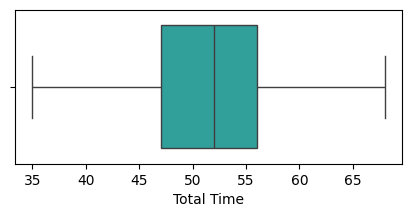

In [191]:
plt.figure(figsize=(5, 2))
sns.boxplot(data=df,x='total_time', color = 'lightseagreen') ## Boxplot for the cost of order
plt.xlabel('Total Time')
plt.show() 

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [187]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it

print('The mean delivery time on weekend is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')




The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekend is around 22 minutes


In [236]:
# Group by 'cuisine_type' and calculate the mean of 'total_time'
avg_total_time_by_cuisine = df.groupby('cuisine_type')['total_time'].mean().reset_index()

# Rename columns for clarity
avg_total_time_by_cuisine.columns = ['cuisine_type', 'avg_total_time']

# Display the result
avg_total_time_by_cuisine


,cuisine_type,avg_total_time
0,American,51.633562
1,Chinese,51.367442
2,French,52.222222
3,Indian,51.191781
4,Italian,52.050336
5,Japanese,51.642553
6,Korean,46.384615
7,Mediterranean,50.586957
8,Mexican,51.116883
9,Middle Eastern,50.755102


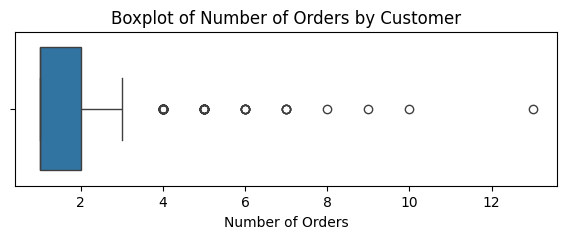

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'customer_id' and count the number of orders per customer
orders_per_customer = df.groupby('customer_id').size().reset_index(name='order_count')

# Create the boxplot for the number of orders per customer
plt.figure(figsize=(7, 2))
sns.boxplot(x=orders_per_customer['order_count'])

# Adding title and labels
plt.title('Boxplot of Number of Orders by Customer')
plt.xlabel('Number of Orders')

# Show the plot
plt.show()


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions: 
* There is little to no correlation between cost, prep time, and delivery time across the board
* Ratings appear to be affected by cost (higher cost associated to higher ratings) and delivery time (higher delivery time associated with lower ratings) but not food preparation time
* American, Japanese, and Italian Restaurants generate the most revenue for the company

### Recommendations:

*  Improve Ratings: Weekend deliveries are faster than weekday deliveries (28 mins vs 22 min), occur more often, and result in the higher earnings. Monitor weekend performance and provide additional incentives for weekday deliveries to decrease average delivery time
* Increase Growth: 555 (29.24%) of Total orders cost more than $20: Promotions should be given to restaurants that have higher priced items to drive growth
* Identify Inefficiencies: 200 (~10.54%) of all orders take more than 60 total minutes for preparation and delivery. Identify drivers responsible for high delivery times, as they impact overall satisfaction
* Reward Star Customers: 75% of customers order 2 or fewer orders. Offer promotions to repeat customers to drive growth and increase the number of orders

---